<a href="https://colab.research.google.com/github/Abhishek-Bhardwaj-AB/COVID-19-PANDEMIC-ANALYSIS/blob/main/COVID-19%20PANDEMIC%20ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [ ]:
!pip install plotly

In [ ]:
!pip install seaborn

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import seaborn as sns
import folium
from folium import plugins
import gc
plt.rcParams['figure.figsize'] = 10,12
import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [ ]:
covid_df = pd.read_excel('/content/drive/MyDrive/Kaggle Covid-19 Data/covid_data.xlsx')
covid_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,World,183839788,438000.0,3979915.0,8495.0,168269841.0,359637.0,11590032.0,77988.0,23585.0,510.6,NaN,NaN,NaN
1,USA,34580198,18399.0,621161.0,322.0,29072881.0,20794.0,4886156.0,3866.0,103862.0,1866.0,507346585.0,1523815.0,3.329449e+08
2,India,30501189,47252.0,401068.0,797.0,29597738.0,61651.0,502383.0,8944.0,21887.0,288.0,414251520.0,297260.0,1.393568e+09
3,Brazil,18687469,65165.0,522068.0,1879.0,16989351.0,58079.0,1176050.0,8318.0,87296.0,2439.0,54003112.0,252267.0,2.140710e+08
4,France,5780648,2683.0,111135.0,24.0,5626699.0,3943.0,42814.0,1123.0,88365.0,1699.0,93728985.0,1432767.0,6.541816e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Marshall Islands,4,NaN,NaN,NaN,4.0,NaN,0.0,NaN,67.0,NaN,NaN,NaN,5.959000e+04
220,Samoa,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,1.997330e+05
221,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN,6.095000e+03
222,Micronesia,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN,1.162280e+05


In [ ]:
# Getting dataframe info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            223 non-null    object 
 1   Total Cases        224 non-null    object 
 2   New Cases          161 non-null    float64
 3   Total Deaths       211 non-null    float64
 4   New Deaths         109 non-null    float64
 5   Total Recovered    223 non-null    float64
 6   New Recovered      143 non-null    float64
 7   Active Cases       223 non-null    float64
 8   Serious, Critical  149 non-null    float64
 9   Tot Cases/1M pop   222 non-null    float64
 10  Deaths/1M pop      209 non-null    float64
 11  Total Tests        211 non-null    float64
 12  Tests/1M pop       210 non-null    float64
 13  Population         220 non-null    float64
dtypes: float64(12), object(2)
memory usage: 24.6+ KB


In [ ]:
covid_df.head(11)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,World,183839788,438000.0,3979915.0,8495.0,168269841.0,359637.0,11590032.0,77988.0,23585.0,510.6,NaN,NaN,NaN
1,USA,34580198,18399.0,621161.0,322.0,29072881.0,20794.0,4886156.0,3866.0,103862.0,1866.0,507346585.0,1523815.0,3.329449e+08
2,India,30501189,47252.0,401068.0,797.0,29597738.0,61651.0,502383.0,8944.0,21887.0,288.0,414251520.0,297260.0,1.393568e+09
3,Brazil,18687469,65165.0,522068.0,1879.0,16989351.0,58079.0,1176050.0,8318.0,87296.0,2439.0,54003112.0,252267.0,2.140710e+08
4,France,5780648,2683.0,111135.0,24.0,5626699.0,3943.0,42814.0,1123.0,88365.0,1699.0,93728985.0,1432767.0,6.541816e+07
5,Russia,5561360,23218.0,136565.0,679.0,5035518.0,18197.0,389277.0,2300.0,38092.0,935.0,150700000.0,1032212.0,1.459972e+08
6,Turkey,5435831,4891.0,49829.0,55.0,5305856.0,5352.0,80146.0,697.0,63766.0,585.0,61236294.0,718347.0,8.524614e+07
7,UK,4854731,26979.0,128189.0,27.0,4329769.0,2213.0,396773.0,300.0,71139.0,1878.0,214786845.0,3147387.0,6.824290e+07
8,Argentina,4512439,20888.0,95382.0,610.0,4114096.0,22043.0,302961.0,5784.0,98934.0,2091.0,16896843.0,370460.0,4.561045e+07
9,Colombia,4297302,28005.0,107723.0,586.0,3993651.0,29577.0,195928.0,8155.0,83564.0,2095.0,20180384.0,392424.0,5.142497e+07


EDA

In [ ]:
cases = covid_df[["Total Recovered", "Active Cases", "Total Deaths"]].loc[0]

cases_df = pd.DataFrame (cases).reset_index() 
cases_df.columns=["Type","Total"]

cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["virus"] = ["covid-19" for i in range(len(cases_df))]

fig = px.bar(cases_df, x="virus", y = "Percentage", color = "Type",hover_data=["Total"])
fig.show()



In [ ]:
cases = covid_df[["New Cases", "New Recovered", "New Deaths"]].loc[0]

cases_df = pd.DataFrame (cases).reset_index() 
cases_df.columns=["Type","Total"]

cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["virus"] = ["covid-19" for i in range(len(cases_df))]

fig = px.bar(cases_df, x="virus", y = "Percentage", color = "Type",hover_data=["Total"])
fig.show()



In [ ]:
covid_df = covid_df.drop([len(covid_df)-1])
country_df = covid_df.drop([0])
country_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
1,USA,34580198,18399.0,621161.0,322.0,29072881.0,20794.0,4886156.0,3866.0,103862.0,1866.0,507346585.0,1523815.0,3.329449e+08
2,India,30501189,47252.0,401068.0,797.0,29597738.0,61651.0,502383.0,8944.0,21887.0,288.0,414251520.0,297260.0,1.393568e+09
3,Brazil,18687469,65165.0,522068.0,1879.0,16989351.0,58079.0,1176050.0,8318.0,87296.0,2439.0,54003112.0,252267.0,2.140710e+08
4,France,5780648,2683.0,111135.0,24.0,5626699.0,3943.0,42814.0,1123.0,88365.0,1699.0,93728985.0,1432767.0,6.541816e+07
5,Russia,5561360,23218.0,136565.0,679.0,5035518.0,18197.0,389277.0,2300.0,38092.0,935.0,150700000.0,1032212.0,1.459972e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Vanuatu,4,NaN,1.0,NaN,3.0,NaN,0.0,NaN,13.0,3.0,23000.0,73180.0,3.142940e+05
219,Marshall Islands,4,NaN,NaN,NaN,4.0,NaN,0.0,NaN,67.0,NaN,NaN,NaN,5.959000e+04
220,Samoa,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,1.997330e+05
221,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN,6.095000e+03


In [ ]:
LOOK_AT = 10
country=country_df.columns[1:14]

fig = go.Figure()

c=0

for i in country_df.index:
  if c < LOOK_AT:
    fig.add_trace(go.Bar(name = country_df['Country'][i], x= country, y = country_df.loc[i][1:14]))
    
  else:
    break
  c +=1

fig.update_layout(title = {"text": f'top {LOOK_AT} countries affected'},yaxis_type = "log")
fig.show()

**FORECASTING**

In [ ]:
daily_df = pd.read_csv('/content/drive/MyDrive/Kaggle Covid-19 Data/Covid_daily_Data.csv')
daily_df

,date,country,Cases,New Cases,Active Cases,Total Deaths,New Death
0,15-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
1,16-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
2,17-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
3,18-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
4,19-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
110459,26-06-2021,Zimbabwe,46018,801.0,6532.0,1725.0,4.0
110460,27-06-2021,Zimbabwe,46442,424.0,6889.0,1736.0,11.0
110461,28-06-2021,Zimbabwe,47284,842.0,7586.0,1749.0,13.0
110462,29-06-2021,Zimbabwe,48533,1249.0,8449.0,1761.0,12.0


In [ ]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110464 entries, 0 to 110463
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          110464 non-null  object 
 1   country       110464 non-null  object 
 2   Cases         110464 non-null  int64  
 3   New Cases     103591 non-null  float64
 4   Active Cases  109962 non-null  float64
 5   Total Deaths  103938 non-null  float64
 6   New Death     89375 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.9+ MB


In [ ]:
daily_df.head()

,date,country,Cases,New Cases,Active Cases,Total Deaths,New Death
0,15-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
1,16-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
2,17-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
3,18-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN
4,19-02-2020,Afghanistan,0,NaN,0.0,0.0,NaN


In [ ]:
daily_df.tail()

,date,country,Cases,New Cases,Active Cases,Total Deaths,New Death
110459,26-06-2021,Zimbabwe,46018,801.0,6532.0,1725.0,4.0
110460,27-06-2021,Zimbabwe,46442,424.0,6889.0,1736.0,11.0
110461,28-06-2021,Zimbabwe,47284,842.0,7586.0,1749.0,13.0
110462,29-06-2021,Zimbabwe,48533,1249.0,8449.0,1761.0,12.0
110463,30-06-2021,Zimbabwe,49864,1331.0,8954.0,1789.0,28.0


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = daily_df.groupby('date').sum()['Cases'].reset_index()
deaths = daily_df.groupby('date').sum()['Total Deaths'].reset_index()
active = daily_df.groupby('date').sum()['Active Cases'].reset_index()

In [ ]:
confirmed.columns = ['ds', 'y'] 
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
521,2021-05-31,171484194
522,2020-07-31,18222167
523,2020-08-31,26266913
524,2020-10-31,47101617
525,2020-12-31,83875628


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30 )
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
551,2022-01-01
552,2022-01-02
553,2022-01-03
554,2022-01-04
555,2022-01-05


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
551,2022-01-01,1.593989e+08,1.187736e+08,2.002612e+08
552,2022-01-02,1.600631e+08,1.172969e+08,1.995262e+08
553,2022-01-03,1.582897e+08,1.175801e+08,2.008718e+08
554,2022-01-04,1.596225e+08,1.174087e+08,2.019597e+08
555,2022-01-05,1.586635e+08,1.196026e+08,2.017056e+08


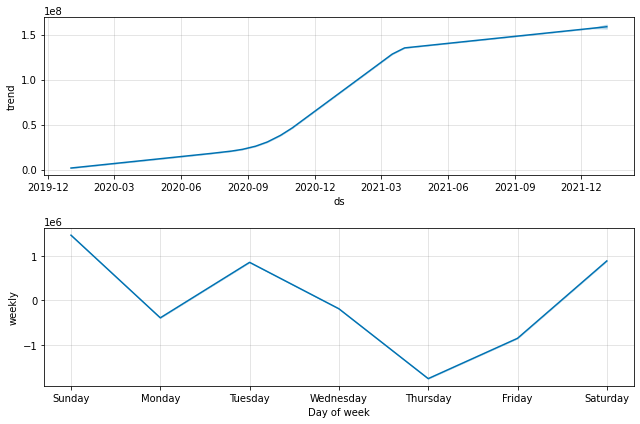

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

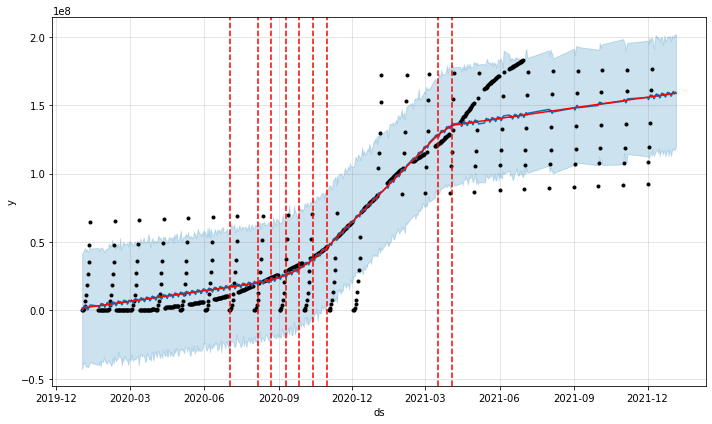

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a = add_changepoints_to_plot (fig.gca(), m, forecast)

In [ ]:
deaths.columns = ['ds', 'y'] 
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=30 )
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
551,2022-01-01
552,2022-01-02
553,2022-01-03
554,2022-01-04
555,2022-01-05


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
551,2022-01-01,3.534766e+06,2.569766e+06,4.487197e+06
552,2022-01-02,3.553456e+06,2.641637e+06,4.496894e+06
553,2022-01-03,3.511270e+06,2.561859e+06,4.434699e+06
554,2022-01-04,3.544609e+06,2.643916e+06,4.583695e+06
555,2022-01-05,3.521360e+06,2.580160e+06,4.392914e+06


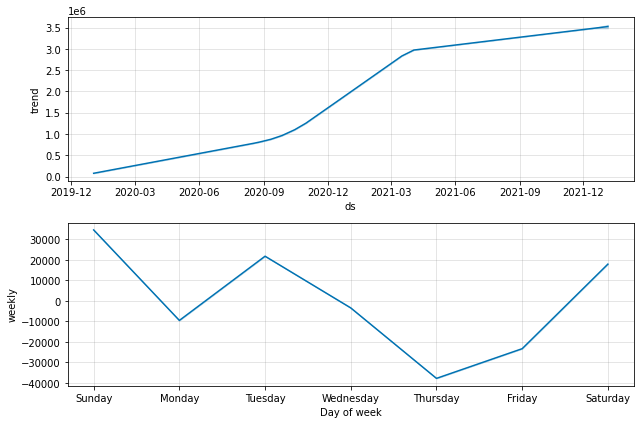

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

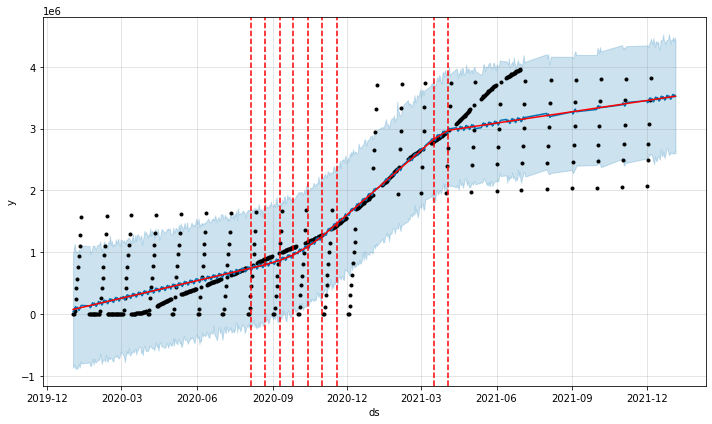

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a = add_changepoints_to_plot (fig.gca(), m, forecast)

In [ ]:
active.columns = ['ds', 'y'] 
active['ds'] = pd.to_datetime(active['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(active)
future = m.make_future_dataframe(periods=30 )
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
551,2022-01-01
552,2022-01-02
553,2022-01-03
554,2022-01-04
555,2022-01-05


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
551,2022-01-01,1.715928e+07,1.086762e+07,2.335998e+07
552,2022-01-02,1.732063e+07,1.049406e+07,2.325975e+07
553,2022-01-03,1.683183e+07,1.070056e+07,2.327873e+07
554,2022-01-04,1.705303e+07,1.076905e+07,2.390048e+07
555,2022-01-05,1.702904e+07,1.058659e+07,2.368647e+07


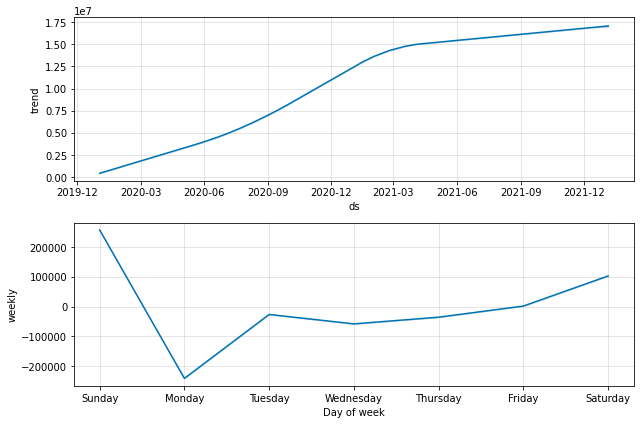

In [ ]:
active_forecast_plot = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

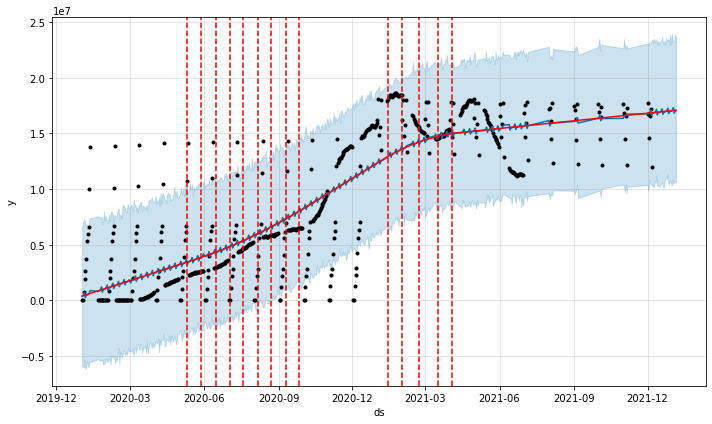

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a = add_changepoints_to_plot (fig.gca(), m, forecast)